# Business Case: Amazon
Amazon is facing a high surge of returns on some of its products, which has led to the downgrade of the company's credibility. The Data Science team has been tasked with the estimating if a customer will return the product or not based on the product description, transportation, importance and prices.

The column profile looks as follows,

| id | features | description |
| :-: | :-: | :-: |
| 01 | ID | ID of Customers |
| 02 |  Warehouse_block | The Company have big Warehouses which is divided in to block such as A,B,C,D,E |
| 03 | Mode_of_Shipment | The Company Ships the products in multiple way such as Ship, Flight and Road |
| 04 | Customer_care_calls | The number of calls made from enquiry for enquiry of the shipment |
| 05 | Customer_rating | The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best) |
| 06 | Cost_of_the_Product | Price of the Product |
| 07 | Prior_purchases | The Number of Prior Purchases of the customer |
| 08 | Product_importance | The company has categorized the product in the various parameter such as low, medium, high. |
| 09 | Gender | If Customer is a Male or Female |
| 10 | Discount_offered | Discount offered on that specific product |
| 11 | Weight_in_gms | It is the weight in grams |
| 12 | Returned | It is the target variable, where 1 Indicates that the product is returned |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
df = pd.read_csv("amazon.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Returned
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
df.shape

(10999, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Returned             10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
# separating the features and label
x = df.drop(columns = ["ID", "Returned"])
y = df["Returned"]
x.shape, y.shape

((10999, 10), (10999,))

In [6]:
# splitting the data into train, validation and test set
from sklearn.model_selection import train_test_split

x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = 0.2, random_state = 42)
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((7039, 10), (7039,), (1760, 10), (1760,), (2200, 10), (2200,))

# EDA

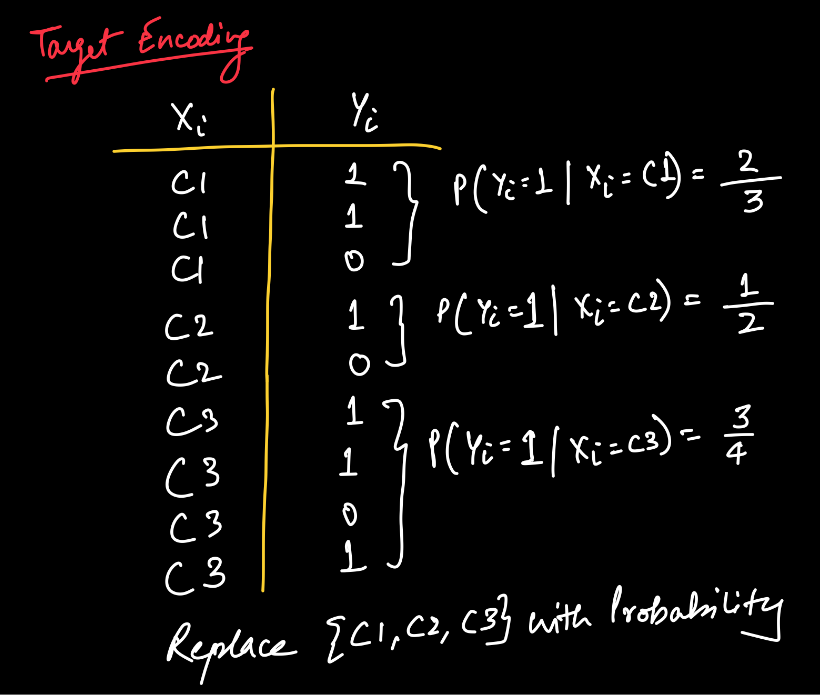

### Which encoding to use to transform the categorical features?
There are manu unique elements in all the categorical features, making use of one hot encoding will make the dataset large and sparse. It is better, therefore, to use target encoding.

### How to target encode the categorical features?
Target encoding is a technique used in Machine Learning to transform categorical features into numerical representations that are more meaningful for predictive models. It does this by replacing each category with the average value of the target variable for that category.

It works as follows,
1. Calculate the average target value for each category:
    - For each unique category within the categorical feature, calculate the mean (or other suitable statistic) of the target variable for all samples belonging to that category.
2. Replace categories with averages:
    - Replace each occurrence of the category in the original dataset with the calculated average target value.

Consider the following table for example,

| City | Rain |
| :-: | :-: |
| New York | 1 |
| London | 0 |
| Paris | 1 |
| New York | 0 |
| London | 1 |
| Paris | 1 |
| New York | 1 |

The target encoding process is,
1. Calculate averages:
    - New York = (1 + 0 + 1)/ 3 = 0.67
    - London = (0 + 1)/ 2 = 0.5
    - Paris = (1 + 1)/ 2 = 1
2. Replace categories:

    | City | Rain | Target Encoded City
    | :-: | :-: | :-: |
    | New York | 1 | 0.67 |
    | London | 0 | 0.5 |
    | Paris | 1 | 1 |
    | New York | 0 | 0.67 |
    | London | 1 | 0.5 |
    | Paris | 1 | 1 |
    | New York | 1 | 0.67 |

Benefits of target encoding,
- Improved model performance: By capturing the relationship between the categorical feature and the target variable, target endcoding can significantly improve the performance of Machine Learning models.
- Simplicity: It is a relatively simple technique to implement and understand.
- Interpretability: The encoded values provide insights into the relationship between the category and the target variables.

Considerations:
- Data leakage: In cases where the training and test sets have significant overlap, target encoding can lead to data leakage, as information from the test set might inadvertently influence the training process. To mitigate this, techniques like k-fold cross-validation or smoothing can be used.
- High ccardinality features: For features with a large number of unique categories, target encoding might not be effective due to potential overfitting. In such cases, techniques like frequency encoding or tree-based encoding can be considered.

In [7]:
from category_encoders import TargetEncoder

encoder = TargetEncoder(cols = ["Warehouse_block", "Mode_of_Shipment", "Product_importance", "Gender"])
x_train = encoder.fit_transform(x_train, y_train)
x_val = encoder.transform(x_val, y_val)
x_test = encoder.transform(x_test, y_test)

In [8]:
x_train.sample(5)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
8628,0.600336,0.608167,5,5,225,5,0.600878,0.596148,7,1168
6166,0.603581,0.608167,4,3,250,2,0.586928,0.596148,4,4808
7783,0.601109,0.576471,6,5,244,3,0.600878,0.596148,9,5634
5219,0.601109,0.608167,7,5,310,4,0.600878,0.599487,5,1975
1372,0.603581,0.608167,4,5,150,2,0.600878,0.599487,30,1782


In [9]:
x_val.head(5)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
983,0.601109,0.600251,5,4,133,3,0.600878,0.596148,9,1051
629,0.601109,0.600251,4,5,245,2,0.600878,0.599487,19,2616
8502,0.600336,0.608167,5,1,179,2,0.634426,0.596148,8,5301
10508,0.578005,0.600251,4,2,222,2,0.586928,0.596148,10,5115
2501,0.601109,0.600251,2,1,252,2,0.600878,0.596148,35,2526


In [10]:
x_test.sample(5)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
1413,0.602763,0.600251,3,4,243,2,0.600878,0.599487,14,3693
5012,0.578005,0.600251,7,3,278,4,0.600878,0.599487,8,1909
8962,0.603581,0.600251,4,3,185,5,0.600878,0.599487,9,5648
8723,0.601109,0.600251,5,3,255,4,0.600878,0.599487,5,5870
8200,0.603581,0.576471,3,3,169,3,0.600878,0.599487,7,5976


# Scaling

In [11]:
# using "StandardScaler" to scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

### What happens if the data is not scaled?
If the data is not scaled, then say if feature $f_1$ has a range from 1 to 1000 and the other feature $f_2$ has a range from 0 to 1, then weights $w_1$ and $w_2$ associated with these features will vary a lot, with $w_1$ being very high in comparison to $w_2$.

Thus the plot for loss function ($L(w, b) = \frac{1}{2n} \sum_{i = 1}^n L(\hat{y_i}, y_i)$) against the weights for n samples, becomes squashed, very unsymmetric and closed.

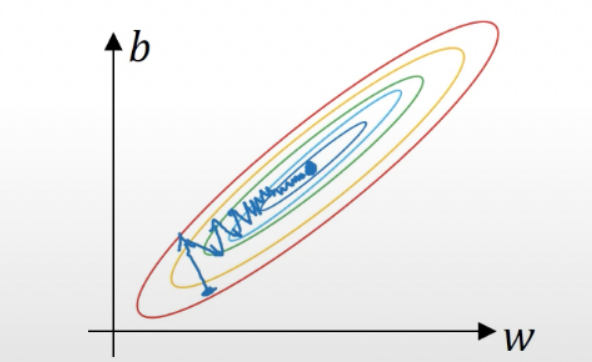

### Why is there an issue with a squashed and closed loss function plot?
A very small learning rate will be required by the gradient descent to reach the global minima, thus increasing the number of steps and size.

### What happens if the data is scaled?
If the data is scaled, it bring the range of both $f_1$ and $f_2$ to the same range. Thus bringing the weights for both features close to each other. Therefore the plot for the loss function ($L(w, b)$) becomes spread out and symmetric.

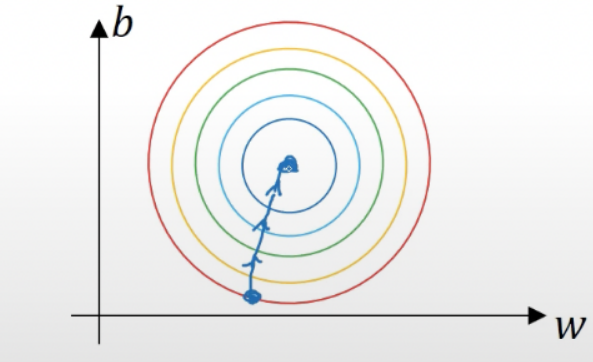

### Why a spread out and symmetric loss function plot is the preferred?
It helps in setting a fairly larger learning rate to quickly reach the global minima.

# Baseline Model
